In [76]:
import pandas as pd
import numpy as sb
import matplotlib.pyplot as plt
import seaborn as sb

In [77]:
df=pd.read_csv("../Datasets/Credit card transactions - India - Simple.csv")

In [78]:
df

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019
26050,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174


In [79]:
df = df.rename( columns = {'Card Type':'Card_Type'})
df = df.rename( columns = {'Exp Type':'Exp_Type'})

In [80]:
df.Date = df.Date.astype('datetime64[ns]')

In [81]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [82]:
df

,index,City,Date,Card_Type,Exp_Type,Gender,Amount,Year,Month
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,2014,10
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,2014,8
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,2014,8
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,2014,4
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,2015,5
...,...,...,...,...,...,...,...,...,...
26047,26047,"Kolkata, India",2014-06-22,Silver,Travel,F,128191,2014,6
26048,26048,"Pune, India",2014-08-03,Signature,Travel,M,246316,2014,8
26049,26049,"Hyderabad, India",2015-01-16,Silver,Travel,M,265019,2015,1
26050,26050,"Kanpur, India",2014-09-14,Silver,Travel,M,88174,2014,9


In [83]:
df.dtypes

index                 int64
City                 object
Date         datetime64[ns]
Card_Type            object
Exp_Type             object
Gender               object
Amount                int64
Year                  int32
Month                 int32
dtype: object

In [84]:
df['City'].value_counts()

City
Bengaluru, India          3552
Greater Mumbai, India     3493
Ahmedabad, India          3491
Delhi, India              3482
Hyderabad, India           784
                          ... 
Rayagada, India              1
Varanasi, India              1
Hugli-Chinsurah, India       1
Alirajpur, India             1
Fazilka, India               1
Name: count, Length: 986, dtype: int64

In [85]:
df.groupby('City')['Amount'].mean().nlargest(10)

City
Thodupuzha, India      296684.000000
Nahan, India           264597.600000
Alwar, India           263488.666667
Manendragarh, India    257140.500000
Vellore, India         256179.000000
Kashipur, India        254690.750000
Rewari, India          253201.800000
Yadgir, India          249814.333333
Kadapa, India          249608.428571
Viramgam, India        246201.000000
Name: Amount, dtype: float64

In [86]:
df.groupby(['Month','City'])['Amount'].sum()

Month  City              
1      Adoni, India            205703
       Adoor, India              8944
       Agra, India             129754
       Ahmedabad, India      60556530
       Aizawl, India           241529
                               ...   
12     Yerraguntla, India      259335
       Zaidpur, India          154299
       Zira, India             283129
       Zirakpur, India         175566
       Zunheboto, India         78591
Name: Amount, Length: 4700, dtype: int64

In [87]:
df.groupby('Date')['Amount'].sum()

Date
2013-10-04    9738755
2013-10-05    8062632
2013-10-06    6990055
2013-10-07    7822992
2013-10-08    5832533
               ...   
2015-05-22    6613863
2015-05-23    6393798
2015-05-24    7171912
2015-05-25    5176669
2015-05-26    7591837
Name: Amount, Length: 600, dtype: int64

In [88]:
df.groupby(['Year','Card_Type'])['Amount'].sum()

Year  Card_Type
2013  Gold         144740555
      Platinum     155964176
      Signature    161225096
      Silver       151714057
2014  Gold         600688076
      Platinum     600077102
      Signature    606750478
      Silver       647198377
2015  Gold         239110905
      Platinum     251597741
      Signature    245065531
      Silver       270701279
Name: Amount, dtype: int64

In [89]:
df.groupby(['Year','Card_Type'])['Amount'].mean()

Year  Card_Type
2013  Gold         153489.453871
      Platinum     160622.220391
      Signature    161872.586345
      Silver       149178.030482
2014  Gold         154458.235022
      Platinum     155742.824293
      Signature    155856.788595
      Silver       155726.269731
2015  Gold         155772.576547
      Platinum     159846.087039
      Signature    157294.949294
      Silver       162388.289742
Name: Amount, dtype: float64

In [38]:
a = df['Date'].sort_values().head(10)
a

15464   2013-10-04
9427    2013-10-04
9418    2013-10-04
9244    2013-10-04
1521    2013-10-04
1612    2013-10-04
15118   2013-10-04
18278   2013-10-04
4104    2013-10-04
50      2013-10-04
Name: Date, dtype: datetime64[ns]

In [39]:
b = df['Date'].sort_values(ascending=False).head(10)
b

13424   2015-05-26
12574   2015-05-26
21610   2015-05-26
24604   2015-05-26
21912   2015-05-26
1491    2015-05-26
12432   2015-05-26
22448   2015-05-26
1077    2015-05-26
11566   2015-05-26
Name: Date, dtype: datetime64[ns]

In [40]:
df.Date.mean()

Timestamp('2014-07-30 11:34:44.385075968')

In [41]:
df.Month.mean()

6.354022723783203

In [42]:
df['Card_Type'].value_counts()

Card_Type
Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: count, dtype: int64

In [43]:
df['Exp_Type'].value_counts()

Exp_Type
Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: count, dtype: int64

In [46]:
df.groupby('Card_Type')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Card_Type,,,,,,,,
Gold,6367.0,154631.621800,105800.484508,1038.0,74389.50,150431.0,224538.50,996754.0
Platinum,6398.0,157492.813223,102051.710950,1005.0,79394.75,154215.0,227670.25,998077.0
Signature,6447.0,157133.721886,104385.788773,1024.0,76500.00,153972.0,230244.50,994537.0
Silver,6840.0,156376.273830,100127.272753,1018.0,78180.00,154028.5,230039.75,955468.0


In [48]:
df.groupby(['Card_Type','Exp_Type'])['Amount'].mean().unstack()

Exp_Type,Bills,Entertainment,Food,Fuel,Grocery,Travel
Card_Type,,,,,,
Gold,179565.245223,151765.934383,146563.127080,147790.054753,148567.339589,147122.150943
Platinum,180657.117168,156367.934288,153405.404814,149054.808756,151646.743363,135495.491620
Signature,179599.262907,152691.436752,155190.228743,146032.260498,152559.080882,153625.899441
Silver,174959.112444,149533.561014,148786.211659,157256.315362,151341.088993,156624.916667


In [49]:
df.groupby('Exp_Type')['Amount'].sum()

Exp_Type
Bills            907072473
Entertainment    726437536
Food             824724009
Fuel             789135821
Grocery          718207923
Travel           109255611
Name: Amount, dtype: int64

In [50]:
df['Exp_Type'].sort_values(ascending=False).head(10)

25486    Travel
25399    Travel
25403    Travel
25402    Travel
25401    Travel
25479    Travel
25489    Travel
25490    Travel
25478    Travel
25477    Travel
Name: Exp_Type, dtype: object

In [51]:
df.Card_Type.unique()

array(['Gold', 'Platinum', 'Silver', 'Signature'], dtype=object)

In [52]:
df.describe()

,index,Date,Amount,Year,Month
count,26052.000000,26052,26052.000000,26052.000000,26052.000000
mean,13025.500000,2014-07-30 11:34:44.385075968,156411.537425,2014.092392,6.354023
min,0.000000,2013-10-04 00:00:00,1005.000000,2013.000000,1.000000
25%,6512.750000,2014-03-02 00:00:00,77120.250000,2014.000000,3.000000
50%,13025.500000,2014-08-02 00:00:00,153106.500000,2014.000000,6.000000
75%,19538.250000,2014-12-28 00:00:00,228050.000000,2014.000000,10.000000
max,26051.000000,2015-05-26 00:00:00,998077.000000,2015.000000,12.000000
std,7520.708943,NaN,103063.254287,0.620761,3.739676


In [53]:
df.groupby('Card_Type')['Exp_Type'].describe()

,count,unique,top,freq
Card_Type,,,,
Gold,6367,6,Food,1322
Platinum,6398,6,Food,1371
Signature,6447,6,Food,1329
Silver,6840,6,Food,1441


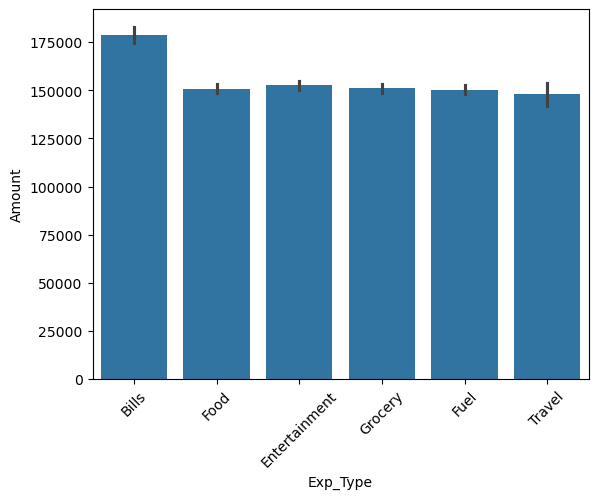

In [54]:
sb.barplot(x=df.Exp_Type,y=df.Amount)
plt.xticks(rotation=45)
plt.show()

In [57]:
df.groupby(['Card_Type','Exp_Type'])['Amount'].mean().reset_index()

,Card_Type,Exp_Type,Amount
0,Gold,Bills,179565.245223
1,Gold,Entertainment,151765.934383
2,Gold,Food,146563.127080
3,Gold,Fuel,147790.054753
4,Gold,Grocery,148567.339589
5,Gold,Travel,147122.150943
6,Platinum,Bills,180657.117168
7,Platinum,Entertainment,156367.934288
8,Platinum,Food,153405.404814
9,Platinum,Fuel,149054.808756


In [58]:
pd.crosstab(df['Card_Type'],df['Exp_Type'])

Exp_Type,Bills,Entertainment,Food,Fuel,Grocery,Travel
Card_Type,,,,,,
Gold,1256,1143,1322,1315,1119,212
Platinum,1229,1187,1371,1302,1130,179
Signature,1259,1170,1329,1286,1224,179
Silver,1334,1262,1441,1354,1281,168


In [59]:
df.corr(numeric_only=True)

,index,Amount,Year,Month
index,1.000000,-0.106806,-0.006092,0.002670
Amount,-0.106806,1.000000,0.009809,-0.010555
Year,-0.006092,0.009809,1.000000,-0.662265
Month,0.002670,-0.010555,-0.662265,1.000000


In [60]:
df['Card_Type'].value_counts()

Card_Type
Silver       6840
Signature    6447
Platinum     6398
Gold         6367
Name: count, dtype: int64

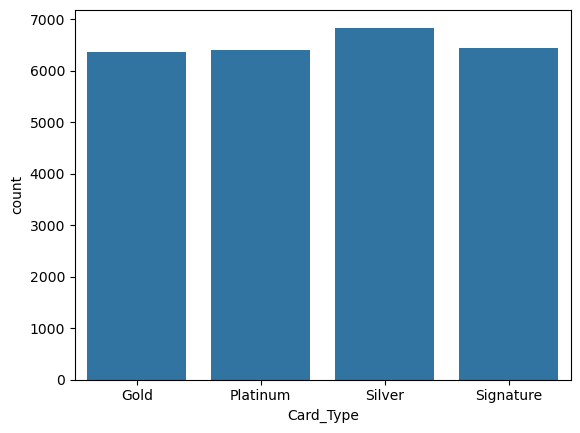

In [61]:
sb.countplot(x=df.Card_Type)
plt.show()

In [64]:
df.groupby('Gender')['Amount'].mean()

Gender
F    161206.946637
M    151109.145086
Name: Amount, dtype: float64

In [65]:
df.groupby(['Exp_Type','Gender'])['Amount'].mean()

Exp_Type       Gender
Bills          F         202809.604545
               M         147446.800721
Entertainment  F         150446.028943
               M         154656.939865
Food           F         150337.742032
               M         151736.731946
Fuel           F         149897.753535
               M         150323.257576
Grocery        F         150595.962932
               M         151573.914445
Travel         F         147402.453826
               M         148718.888579
Name: Amount, dtype: float64

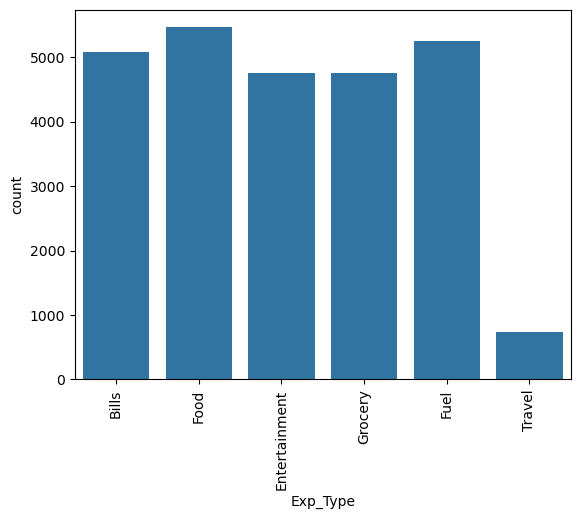

In [66]:
sb.countplot(x=df.Exp_Type)
plt.xticks(rotation=90)
plt.show()

In [67]:
df['City'].value_counts().nlargest(10)

City
Bengaluru, India         3552
Greater Mumbai, India    3493
Ahmedabad, India         3491
Delhi, India             3482
Hyderabad, India          784
Chennai, India            774
Kolkata, India            773
Kanpur, India             764
Lucknow, India            759
Jaipur, India             752
Name: count, dtype: int64

In [68]:
df['City']=df['City'].astype(str)

In [69]:
df.groupby('Date')['Amount'].sum()

Date
2013-10-04    9738755
2013-10-05    8062632
2013-10-06    6990055
2013-10-07    7822992
2013-10-08    5832533
               ...   
2015-05-22    6613863
2015-05-23    6393798
2015-05-24    7171912
2015-05-25    5176669
2015-05-26    7591837
Name: Amount, Length: 600, dtype: int64

In [71]:
a=df['Amount'].mean()+3*df['Amount'].std()
a

465601.300285343

In [72]:
df[df['Amount'] > a]

,index,City,Date,Card_Type,Exp_Type,Gender,Amount,Year,Month
15,15,"Greater Mumbai, India",2014-11-28,Platinum,Bills,F,647116,2014,11
17,17,"Greater Mumbai, India",2015-03-30,Gold,Bills,F,986379,2015,3
19,19,"Greater Mumbai, India",2013-11-09,Platinum,Bills,F,735566,2013,11
21,21,"Delhi, India",2014-07-01,Signature,Bills,F,809623,2014,7
22,22,"Greater Mumbai, India",2015-03-27,Silver,Bills,F,467014,2015,3
...,...,...,...,...,...,...,...,...,...
344,344,"Ahmedabad, India",2013-12-07,Platinum,Bills,F,515263,2013,12
346,346,"Ahmedabad, India",2014-06-16,Silver,Bills,F,934683,2014,6
348,348,"Greater Mumbai, India",2015-01-28,Gold,Bills,F,654519,2015,1
349,349,"Ahmedabad, India",2014-06-12,Gold,Bills,F,958047,2014,6


In [74]:
df.groupby('Exp_Type')['Amount'].mean().sort_values(ascending=False).head(10)

Exp_Type
Bills            178627.899370
Entertainment    152548.831583
Grocery          151074.447413
Food             150965.405272
Fuel             150111.436371
Travel           148042.833333
Name: Amount, dtype: float64

In [75]:
pd.crosstab(df['Exp_Type'],df['Card_Type'])

Card_Type,Gold,Platinum,Signature,Silver
Exp_Type,,,,
Bills,1256,1229,1259,1334
Entertainment,1143,1187,1170,1262
Food,1322,1371,1329,1441
Fuel,1315,1302,1286,1354
Grocery,1119,1130,1224,1281
Travel,212,179,179,168
